## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv("ab_data.csv", ',')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


### Self-reflection 

>` portion of users who uses a specific webpage selling a specific product and changed its interface ( the page ) and hoping that the impact of the new change would generate more sales ( have a service and want to check of those would convert (subcsripe/buy/switch) if the changed thier interface ( new_page ).`

>`user_id :epresent the unique IDs.`
>`ime_stamp : time of the loging of these data to our data base ( time of users when they used it).`
>`group : 'control' refer to the people who still uses the old_page (Orginal people), "treatment" refere to the people who are newly experiencing the New_page (expermental people).`
>`landing_page : this the Actual result of each user which page actually apeared to the users under the condition of the group feature.`
>`converted : 0 means they didn't bought/clicked the service/product , 1 means they that they bought/clicked the service/product`

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.nunique()['user_id']

290584

d. The proportion of users converted.

In [5]:
p_converted = df.query('converted == 1').shape[0]/df.shape[0]
p_converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('landing_page == "new_page" and group == "control"').shape[0] + df.query('landing_page == "old_page" and group == "treatment"').shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

#### `We need to check the rows that mismatch the creteria that we're analysing by dropping them ( thier effect could miss lead us )`

In [8]:
#copy of our dataframe to adjust the changes
df2 = df.copy()

In [9]:
#IF THE LANDING PAGE IS CONSIDER A INACCURATLY ASSIGNED TO CONTROL GROUP (GETTING THIER INDEX) - CASE IF NEW_PAGE
index_1 = df2.query('landing_page == "new_page" and group == "control"').index
index_1

Int64Index([    22,    240,    490,    846,    850,    988,   1198,   1354,
              1474,   1877,
            ...
            293393, 293480, 293568, 293662, 293888, 293894, 293996, 294200,
            294253, 294331],
           dtype='int64', length=1928)

In [10]:
#IF THE LANDING PAGE IS CONSIDER A INACCURATLY ASSIGNED TO CONTROL GROUP (GETTING THIER INDEX) - CASE IF NEW_PAGE
index_2 = df2.query('landing_page == "old_page" and group == "treatment"').index
index_2

Int64Index([   308,    327,    357,    685,    713,    776,    889,   1037,
              1106,   1376,
            ...
            293240, 293302, 293391, 293443, 293530, 293773, 293817, 293917,
            294014, 294252],
           dtype='int64', length=1965)

In [11]:
# combine our result
combined_rep_indexes = index_1.append(index_2)
# DROUPING THOSE INDEXES
df2 = df2.drop(combined_rep_indexes)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
#identifying number if unique users in our data
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#identifying repeated users(duplicates)
df2[df2.user_id.duplicated()].index

Int64Index([2893], dtype='int64')

c. What is the row information for the repeat **user_id**? 

In [15]:
# Show informations of repeated users
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
#dropping the repeated (duplicates) users using .drop
df2.drop(df2[df2.user_id.duplicated()].index, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# indicating the Portion of converted users 
df.query('converted == 1').shape[0]/df2.shape[0]

0.12126269856564711

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# checking the available information
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [19]:
# indicating the Portion of users who converted and are apart of the control group
p_control = df2.query('converted == 1 and group == "control"').shape[0] / df2.query('group == "control"').shape[0]
p_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
# indicating the Portion of users who converted and are apart of the treatment group
p_treatment = df2.query('converted == 1 and group == "treatment"').shape[0] / df2.query('group == "treatment"').shape[0]
p_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
# THE PORTION OF THE NEW PAGE  
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [22]:
# Compute the observed difference in converts
obs_diff = p_treatment - p_control 

# Display observed difference
obs_diff


-0.0015782389853555567

### **Answer :**
> * There's ` no significant evidance ` to conclude wether the new treatment converts (click/buy/subscribe) more people as our result of converted people who tried the new page is 11.88%  which less than those who converted and still using the old_page 12.04 %, thus the new page didn't increase the coverted part that much.
> * in addition the portion both landing page as we see are close to split the data set by half between each other

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


> 1. $H_{0}$ :  **$p_{new}$** =< **$p_{old}$** ( **$p_{new}$** - **$p_{old}$** =< 0 )
> 2. $H_{1}$ :  **$p_{new}$** > **$p_{old}$**  ( **$p_{new}$** - **$p_{old}$** > 0 )

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [23]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
#convert rate based in the whole dataset since the new and old page closely split the date (closely relvant)
p_new = df2.query('converted == 1').shape[0]/df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
#convert rate for old based in the whole dataset since the new and old page closely split the date (closely relvant)
p_old = df2.query('converted == 1').shape[0]/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [26]:
# number of users who got the new page
n_new = df2.query('group == "treatment"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [27]:
# number of users who stayed using old page
n_old = df2.query('group == "control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
#setting the seed to assure you get the same answers
random.seed(42)
new_page_converted = np.random.choice([0,1], size = n_new, p =[(1-p_new), p_new],replace = True)
#viewing our result
new_page_converted.mean() ,new_page_converted.sum()

(0.1199504507604432, 17430)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
#setting the seed to assure you get the same answers
random.seed(42)
old_page_converted = np.random.choice([0,1], size = n_old, p =[(1-p_old), p_old],replace = True)
old_page_converted.mean() ,old_page_converted.sum()

(0.12075801588722002, 17543)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted.mean() - old_page_converted.mean()

-0.0008075651267768214

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

### `Sampling distribution`

In [31]:
# size to be used 
size = df2.shape[0]

In [32]:
# create sampling distribution of difference in average
p_diffs = []
#stimulation
for i in range(10000):
    new_page_converted = np.random.choice([0,1], size = n_new, p =[(1-p_new), p_new],replace = True)
    old_page_converted = np.random.choice([0,1], size = n_old, p =[(1-p_old), p_old],replace = True)
    p_diff  = (new_page_converted.sum()/n_new) - (old_page_converted.sum()/n_old) 
    p_diffs.append(p_diff)
# coverting p_diffs to numpy array
p_diffs = np.array(p_diffs)

In [33]:
# observesion difference (actual) 
#p_treatment & p_control we aready calculated them in part 1 
obs_diffs =  p_treatment - p_control
obs_diffs

-0.0015782389853555567

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   5.,   69.,  409., 1301., 2598., 2887., 1913.,  642.,  156.,
          20.]),
 array([-0.00479936, -0.00387776, -0.00295616, -0.00203456, -0.00111296,
        -0.00019136,  0.00073024,  0.00165184,  0.00257344,  0.00349504,
         0.00441664]),
 <BarContainer object of 10 artists>)

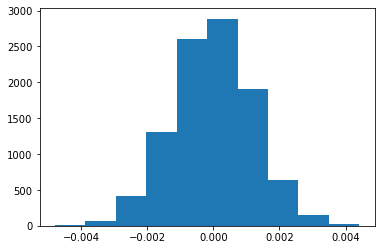

In [34]:
# ploting
plt.hist(p_diffs)

Does this plot look like what you expected? yes, it has a normal distibution shape as expected

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
# actual difference observed in ab_data.csv
a_diffs = p_treatment - p_control
a_diffs
#calculate the proportion of p_diffs greater than the actuall difference
(p_diffs > a_diffs).mean()

0.9055

### `Distribution under the null hypothesis`

In [36]:
# distribution under the null hypothesis
null_hypoth = np.random.normal(0, p_diffs.std(), 10000)

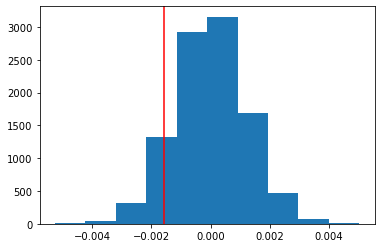

In [37]:
# plot null distribution
plt.hist(null_hypoth)
# plot line for observed statistic
plt.axvline(a_diffs, c='red')

In [38]:
# compute p value (with null)
(null_hypoth > a_diffs).mean()

0.9089

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer :**

`the P-Value (the probability of observing your statistic [the difference betwween the calculated p_diffs and the actuall difference ] if the null hypothesis is true.`

`if P-value is smaller or equal to` $\alpha$ `(0.05 in most cases and it depend wither it's 1-talied or 2-talied): Reject Null Hypothesis.`

`if P-value is greater than` $\alpha$  `: Fail to reject Null Hypothesis.`

> ####  **As we can see p_value (0.9055) (0.9089 under null hypothesis)  > $\alpha$ (0.05) , So we fail to reject the Null Hypothesis as we do not have evidence.**
> #### **In other term : we cann't assume the new page converts more users than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2.query('converted == 1  and landing_page == "old_page"').shape[0]
convert_new = df2.query('converted == 1 and landing_page == "new_page"').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

In [40]:
convert_new, convert_old

(17264, 17489)

In [41]:
n_new , n_old

(145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative='smaller')

z_score,p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [43]:
#import norm from scipy.stats package
from scipy.stats import norm
# the z-score for alpha = 0.05 following the normal distribution of 1 tail
alpha = norm.ppf(1-(0.05))
alpha

1.6448536269514722

**Answer :**


> `**For P-value which is .9050 >` $\alpha$ `(0.05) , so we cann't reject the null hypthesis which means that we cann't assume the new page converts more users than the old page`

> `**For z-scores ( represent standard deviations - and gives you an idea of how far from the mean a data point is) which is 1.31092 here < the driven` $\alpha$ `of 0.05 (1.6448) so we fail to reject the null hypthesis`

> `**The conducted findings in part j and k of P-VALUE are very close to the result using statsmodels (0.9050), so they are closely relative and we can assume they agree with finding` 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer :**

> **Since each row either a converion (1) or no convrison (0),  we have a binary variable so we should perform `logistic  regression` in the case of qualitative variable.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
#Creating a copy of our last dataframe to avoid cofusions
df3 = df2
# create the dummy variables
df3[['control','treatment']]= pd.get_dummies(df3['group'])
df3.head()
# drop one of our variable 
df3 = df2.drop('control',axis = 1)
# adding the intercept column
df3['intercept'] = 1
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


#### ` **Adjusting ab_column as required which represent the treatment when = 1 that's mean we can just rename the "treatment " column to be used as our ab_page column as it matched the criteria**`

In [45]:
# adjusting ab_column as required which represent the treatment when = 1 
# that's mean we can just rename this column to be used as our ab_page column.
df3 = df3.rename(columns={'treatment': 'ab_page'})

df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [46]:
# importing stats
from scipy import stats
# logit Regression model using 2 column from our dummy variables 
lm = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 23 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        01:49:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?


**Answer :**

> **With our regression model(logical regresion) the assumption in our case are as follow :**

>>> $H_{1}$ :  **$p_{new}$** != **$p_{old}$**  ( **$p_{new}$** - **$p_{old}$** != 0 )
 
> **Testing the coefficient of the features that could effect our output which is in our case whether the user has convert or not, studying the effect of other related features and it's measure wether it's significant or not to be included :-**

> **The p_value helps us to decide wether the null hypotheses is true or the aternative if it's =< alpha tha will lead to reject the null assumptions and to agree with the alternative hypothesis asumptions and if p-values less than the significance level indicate that the term is statistically significant, in this case we fail to reject the null cause there's no sufficient evidance or impact from the new feature on our output.**

> **the regresion model is more like testing the coefficient of the feature if it can pass and if it's really making difference.
coefficient is a measure that can inform you about the strength and direction relationship.**

> **The p-value here is .190 greater then 0.05 two-tailed test (our $\alpha$), so we fail to reject our null hypothesis.**

> **What's being tested here is the correlation of the feature ( wether it's treatment or control ) and fail to reject the null so the effect was not significant and can say that the feature effect is not noticable.**

> **in our previous A/B testing in part 2 We were cosidering  making a decision just based on all the data provided,assumig that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%,  check if it has more convertion rate.**

>> `in this exampe project we can relate the direction of our analysis but it's important to know that thier not testing the same thing. it's a way different interpretation and conclusions from different prospectives `

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer :**

> **Considering other things gives us the ability to determine the relative influence of one or more predictor variables to reach better conclusion and know where we should put our focus on and to measure the proper variables. In Addition to exclude independent variables that are not related and include only those that have an actual relationship with the dependent variable.**

> **Disadvantages**

> **The Novelty Effect may arise and that is happening when the engagement and interaction with one of your variations is substantially higher than previously, but only temporarily – giving you a false positive.**

> **If you fit many models during the model selection process, you will find variables that appear to be statistically significant, but they are correlated only by chance and the model gets more inacurrate.**


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
#reading the new dataframe
df_countries = pd.read_csv('./countries.csv')
# merge together our datasets 
df_new = df_countries.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [49]:
#checking Countries in our data
df_countries.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [50]:
### Create the necessary dummy variables
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])

In [51]:
# drop the country column since this is not necessary
df_new = df_new.drop('country', 1)
df_new.head()

,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,CA
user_id,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [52]:
# the findings of our logit Regression using 2 column from our dummy variables 
logistic_model = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'CA']])
result = logistic_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 23 May 2021   Pseudo R-squ.:               1.521e-05
Time:                        01:49:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0507      0.028      1.786      0.074      -0.005       0.106
CA             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

#### Does it appear that country had an impact on conversion? 

**Answer:**

> `Since the conducted P-values for the countries under the test are > alpha (0.05), as a consequence we fail to reject the null hypothesis, which mean that the impact of the country is not significant on conversion for different treatment`


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
# Create the interaction between page and countries
df_new['us_page'] = df_new['US'] * df_new['ab_page']
df_new['uk_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,CA,us_page,uk_page
user_id,,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [54]:
### Fit Your Linear Model And Obtain the Results
logistic_model = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'CA', 'us_page', 'uk_page']])
result = logistic_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 May 2021   Pseudo R-squ.:               3.482e-05
Time:                        01:49:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
US             0.0118      0.040      0.296      0.767      -0.066       0.090
CA             0.0175      0.038      0.465      0.642      -0.056       0.091
us_page        0.0314      0.027      1.181      0.238      -0.021       0.084
uk_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

#### Would we now like to look at an interaction between page and country to see if there significant effects on conversion ?

 **Answer :**
> `Since the conducted P-values for the tested variables are > alpha (0.05), as a consequence we fail to reject the null hypothesis, which mean that the impact of the country is not significant on conversion`

<a id='conclusions'></a>
## Conclusions
> **As we started doing some descriptive staticitic to quantitatively describes and summarizes our data and reached the following conclusion :**

>> **There's no significant evidance to conclude wether the new treatment converts (click/buy/subscribe) more people as our result of converted people who tried the new page is 11.88% which less than those who converted and still using the old_page 12.04 %, thus the new page didn't increase the coverted part that much.**

> **Then we moved to the assesment stage to predict whetwher the impact of new feature would be significant using our inferential statistics and measurements from a sample of data in an experiment to compare the treatment groups and make generalizations about the larger population of subjects allowing us to test a hypothesis and deriving estimates to reach the following decision :**
>> **As we had a p_value of our test (0.9047) (0.903 under null hypothesis)  > $\alpha$ (0.05) , So we failed to reject the Null Hypothesis as we do not have evidence.** <br>
 **In other term : we couldn't assume the new page converts more users than the old page.**



> **Afterward we applied the logistic regression model to the outcome variable to estimate the effect each predictor variable has on the probability of conversion on outcome variable.**
>>**-In our test of logistic regression model we were testing the features(variable including binary ones) that could effect our output which is in our case whether the user has convert or not, studying the effect of other related features and it's measure wether it's significant or not to be included :- <br> -The p_value helped us to decide wether the null hypotheses is true or the aternative if it's =< alpha tha will lead to reject the null assumptions and to agree with the alternative hypothesis asumptions and if p-values less than the significance level indicate that the term is statistically significant, in this case we fail to reject the null cause there's no sufficient evidance or impact from the new feature on our output. <br>
-The p-value here was .190 greater then 0.05 two-tailed test (our  𝛼 ), so we fail to reject our null hypothesis.**<br> **-P-values for the countries variable under the test was > alpha (0.05), as a consequence we failed also to reject the null hypothesis, which meant that the impact of the country was not significant on conversion for different treatment.**


> ### References :
<br> https://seaborn.pydata.org/index.html<br>
https://pandas.pydata.org/docs/user_guide/index.html#user-guide<br> 
https://numpy.org/doc/stable/doc_conventions.html<br> 
https://www.scipy.org/docs.html<br> 
https://www.statsmodels.org/v0.10.1/examples/index.html<br> 
https://stattrek.com/hypothesis-test/how-to-test-hypothesis.aspx?tutorial=ap <br>
stack overflow<br>
geeksforgeeks<br>
Udacity classroom support materials


Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.